**Final AI Project**
****

This is an AI project designed by Paa Kwesi Atobrah and Samuel Dartey-Baah which evaluates a users sleep quality and gives personalised tips on how to better it.

In [147]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
# installing scikeras to import KerasClassifier
!pip install scikeras
!pip install keras-tuner

In [149]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from keras.models import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [150]:
# loading the dataset
sleep_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sleep_health_and_lifestyle_dataset.csv')

In [151]:
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [152]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [153]:
# dropping unnecessary columns
sleep_df.drop(columns=['Person ID'],inplace=True)

In [154]:
sleep_df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [155]:
sleep_df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [156]:
# dividing Blood Pressure into its two components
sleep_df['Systolic'] = sleep_df['Blood Pressure'].str.split('/', expand=True)[0].astype(int)
sleep_df['Diastolic'] = sleep_df['Blood Pressure'].str.split('/', expand=True)[1].astype(int)

# dropping Blood Pressure
sleep_df.drop(columns=['Blood Pressure'],inplace=True)

In [157]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  Systolic                 374 non-null    int64  
 12  Diastolic                374 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB


In [158]:
# checking to see if there are null values in my dataset
sleep_df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic                   0
Diastolic                  0
dtype: int64

In [159]:
#creating new dataframe
encoded_sleep_df = sleep_df.copy()

In [160]:
# label encoding categorical values
label_encoder = LabelEncoder()

# finding the categorical columns
categorical_columns = encoded_sleep_df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.tolist()

for column in categorical_columns:
    encoded_column_name = column + '_encoded'
    encoded_sleep_df[encoded_column_name] = label_encoder.fit_transform(encoded_sleep_df[column])

# dropping original categorical values in sleep_df
encoded_sleep_df.drop(columns= categorical_columns , inplace =True)

In [161]:
encoded_sleep_df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Gender_encoded,Occupation_encoded,BMI Category_encoded,Sleep Disorder_encoded
0,27,6.1,6,42,6,77,4200,126,83,1,9,3,1
1,28,6.2,6,60,8,75,10000,125,80,1,1,0,1
2,28,6.2,6,60,8,75,10000,125,80,1,1,0,1
3,28,5.9,4,30,8,85,3000,140,90,1,6,2,2
4,28,5.9,4,30,8,85,3000,140,90,1,6,2,2


In [162]:
# seeing the different ratings available
quality_of_sleep_values = encoded_sleep_df['Quality of Sleep'].unique()
quality_of_sleep_values.sort()
quality_of_sleep_values

array([4, 5, 6, 7, 8, 9])

In [163]:
# encoding sleep quality
encoded_sleep_df['Quality of Sleep'] = encoded_sleep_df['Quality of Sleep'].replace({4: 0, 5: 1, 6: 2, 7: 3, 8: 4, 9: 5})

In [164]:
# using random forest to get the most important features
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = encoded_sleep_df.drop(columns=['Quality of Sleep'])
y = encoded_sleep_df['Quality of Sleep']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# creating a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=5, n_estimators=100)
rf_classifier.fit(X_train_scaled, y_train)

# getting the relevant features
feature_importances = rf_classifier.feature_importances_

# creating a data set of the most relevant features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# getting the  8 most relevant features
needed_features = feature_importance_df.head(10)['Feature'].tolist()
needed_features.remove('Occupation_encoded')

print(f'These are the most necessary features: {needed_features}')

These are the most necessary features: ['Stress Level', 'Sleep Duration', 'Age', 'Heart Rate', 'Physical Activity Level', 'Daily Steps', 'Diastolic', 'Systolic', 'BMI Category_encoded']


**Exploratory Data Analysis**
****

<Axes: title={'center': 'Variable Sleep Disorder'}, xlabel='Sleep Disorder', ylabel='count'>

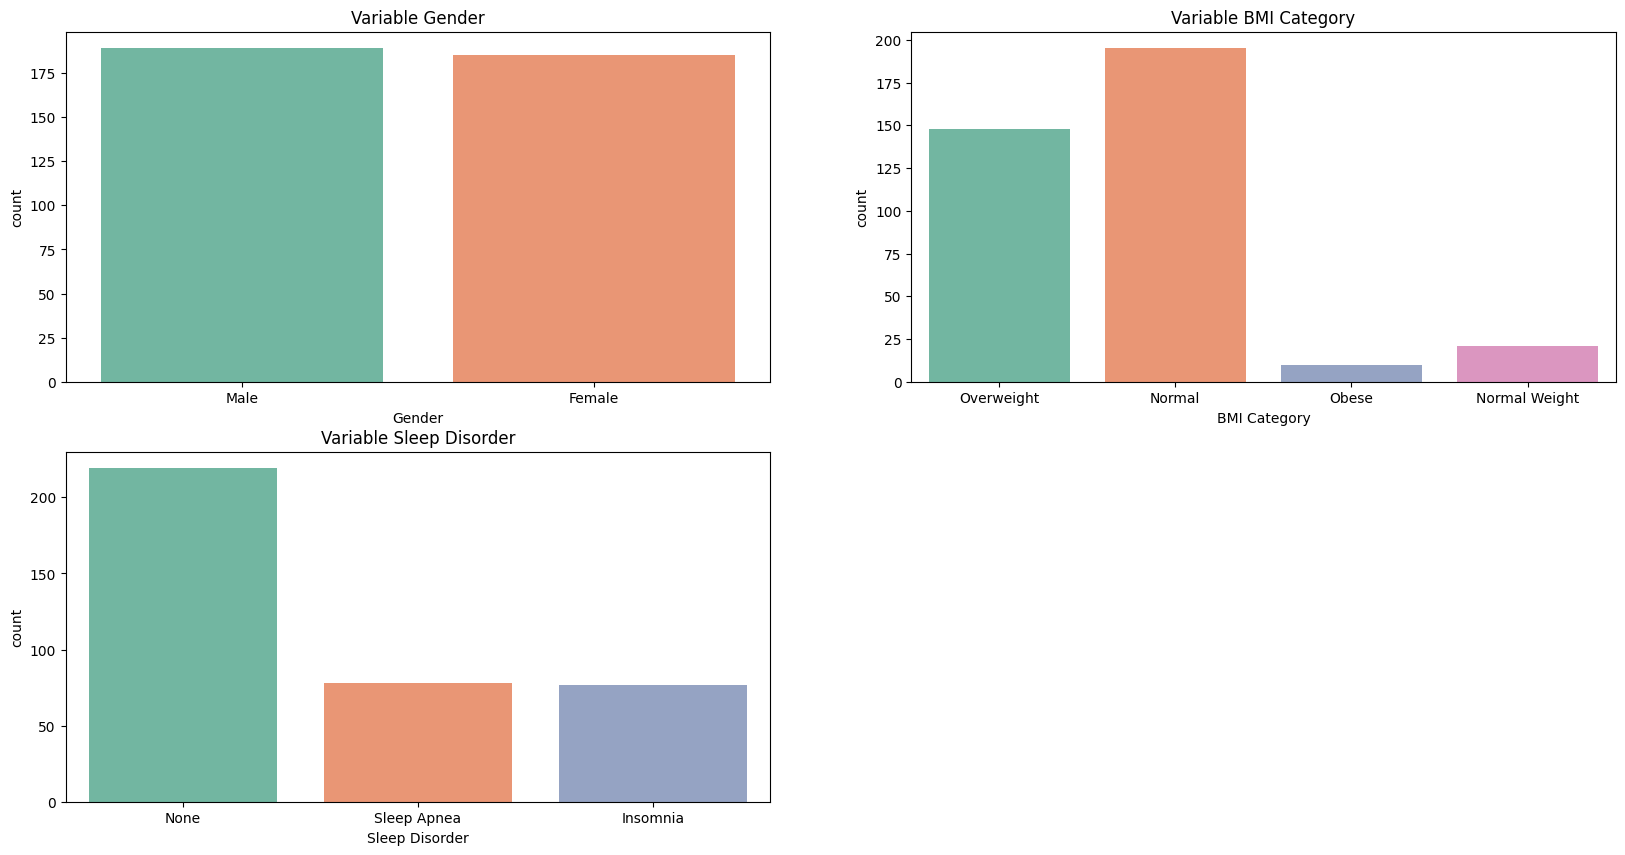

In [109]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = sleep_df)

plt.subplot(2, 2, 2)
plt.gca().set_title('Variable BMI Category')
sns.countplot(x = 'BMI Category', palette = 'Set2', data = sleep_df)

plt.subplot(2, 2, 3)
plt.gca().set_title('Variable Sleep Disorder')
sns.countplot(x = 'Sleep Disorder', palette = 'Set2', data = sleep_df)

<Axes: title={'center': 'Variable Occupation'}, xlabel='Occupation', ylabel='count'>

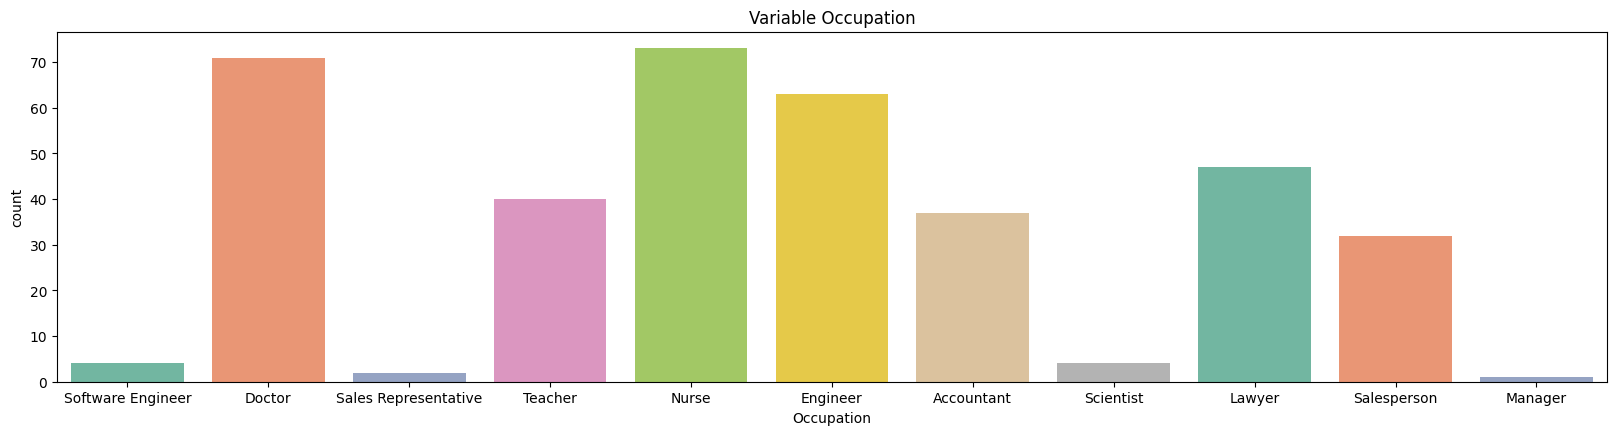

In [117]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Occupation')
sns.countplot(x = 'Occupation', palette = 'Set2', data = sleep_df)



<Axes: xlabel='Daily Steps', ylabel='Count'>

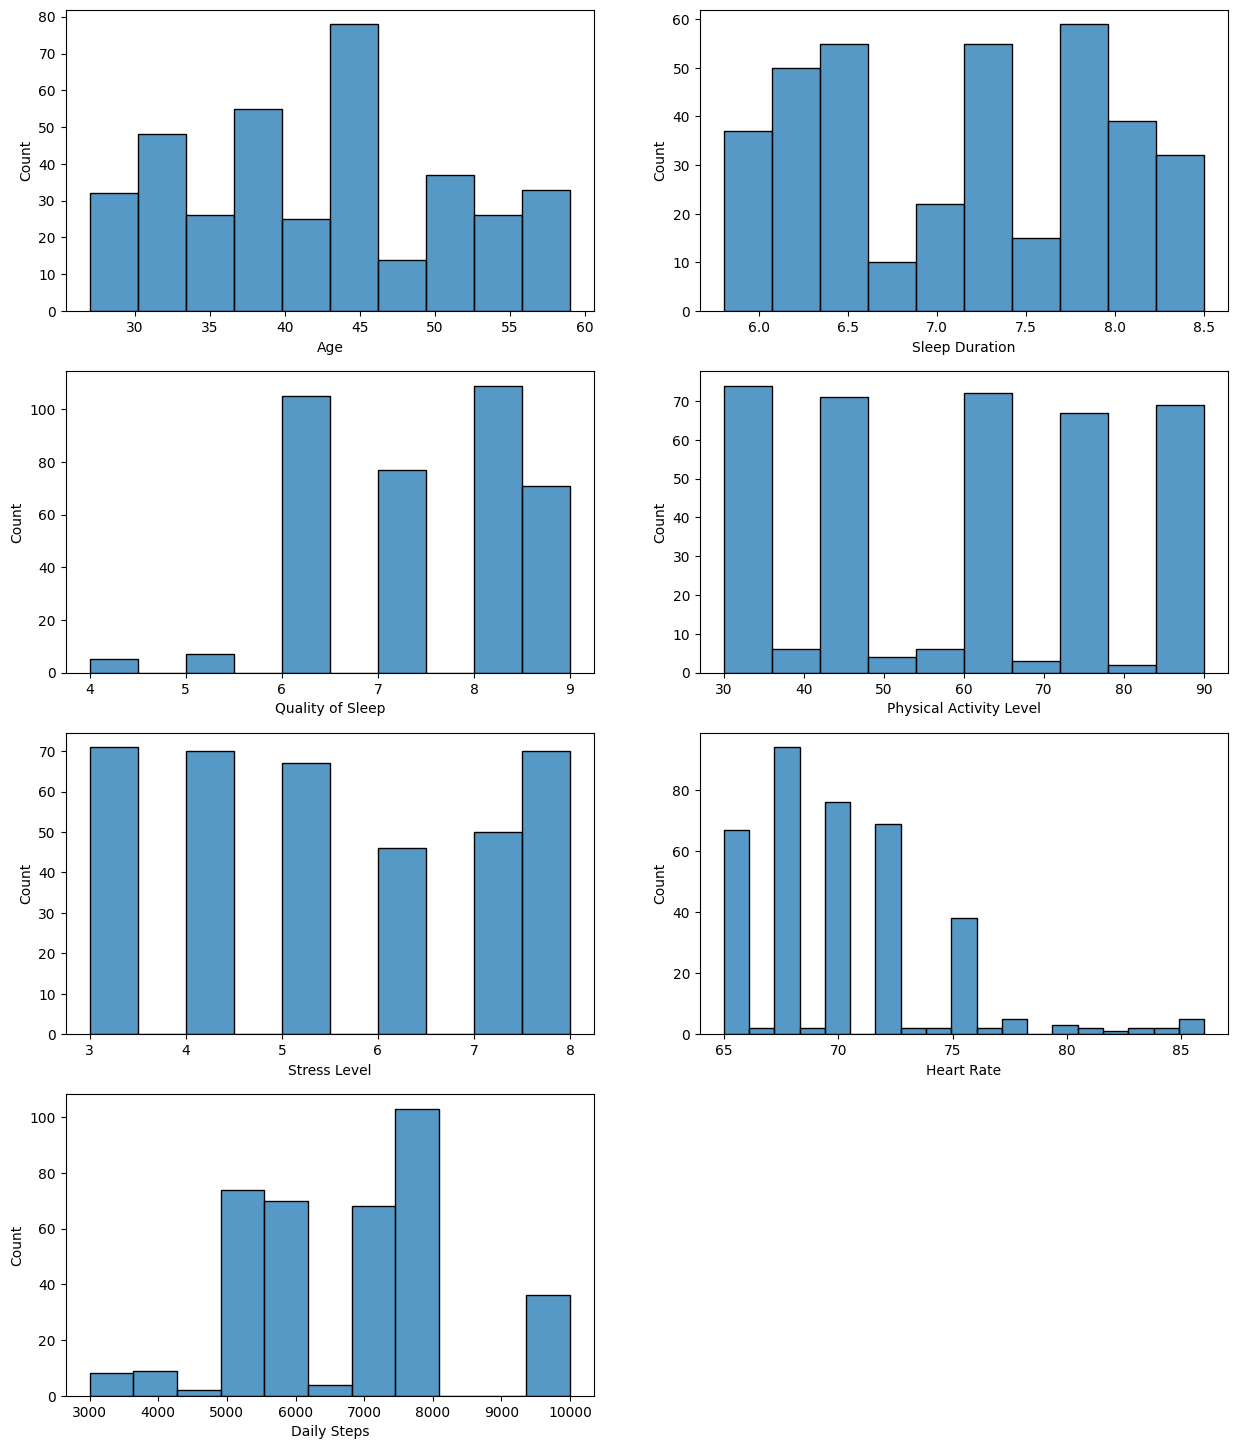

In [111]:
plt.figure(figsize = (15, 18))

plt.subplot(4, 2, 1)
sns.histplot(x = sleep_df['Age'], kde = False)

plt.subplot(4, 2, 2)
sns.histplot(x = sleep_df['Sleep Duration'], kde = False)

plt.subplot(4, 2, 3)
sns.histplot(x = sleep_df['Quality of Sleep'], kde = False)

plt.subplot(4, 2, 4)
sns.histplot(x = sleep_df['Physical Activity Level'], kde = False)

plt.subplot(4, 2, 5)
sns.histplot(x = sleep_df['Stress Level'], kde = False)

plt.subplot(4, 2, 6)
sns.histplot(x = sleep_df['Heart Rate'], kde = False)

plt.subplot(4, 2, 7)
sns.histplot(x = sleep_df['Daily Steps'], kde = False)

<Axes: title={'center': 'Boxplot Age'}, xlabel='Age'>

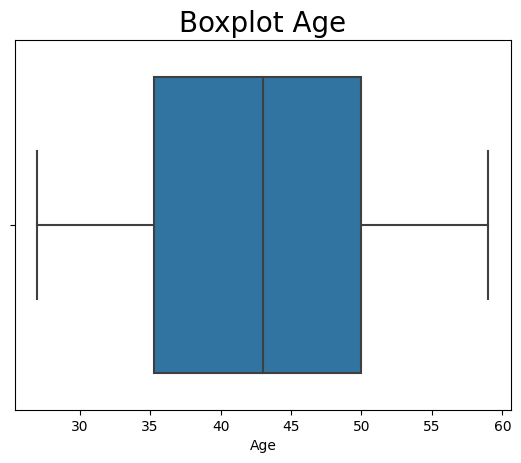

In [112]:
plt.title("Boxplot Age", fontdict = {'fontsize': 20})
sns.boxplot(x=sleep_df["Age"])

<Axes: title={'center': 'Boxplot Sleep Duration'}, xlabel='Quality of Sleep'>

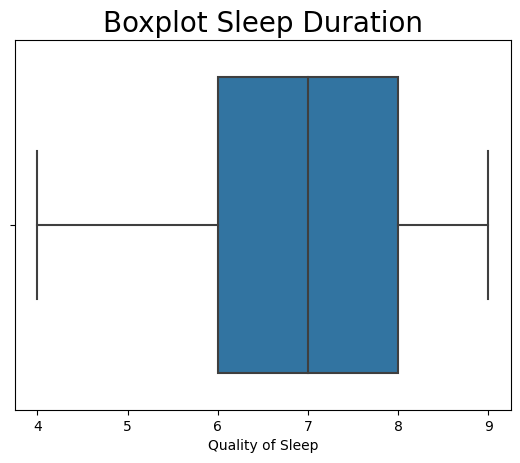

In [114]:
plt.title("Boxplot Sleep Duration", fontdict = {'fontsize': 20})
sns.boxplot(x=sleep_df["Quality of Sleep"])

<Axes: xlabel='Quality of Sleep', ylabel='Daily Steps'>

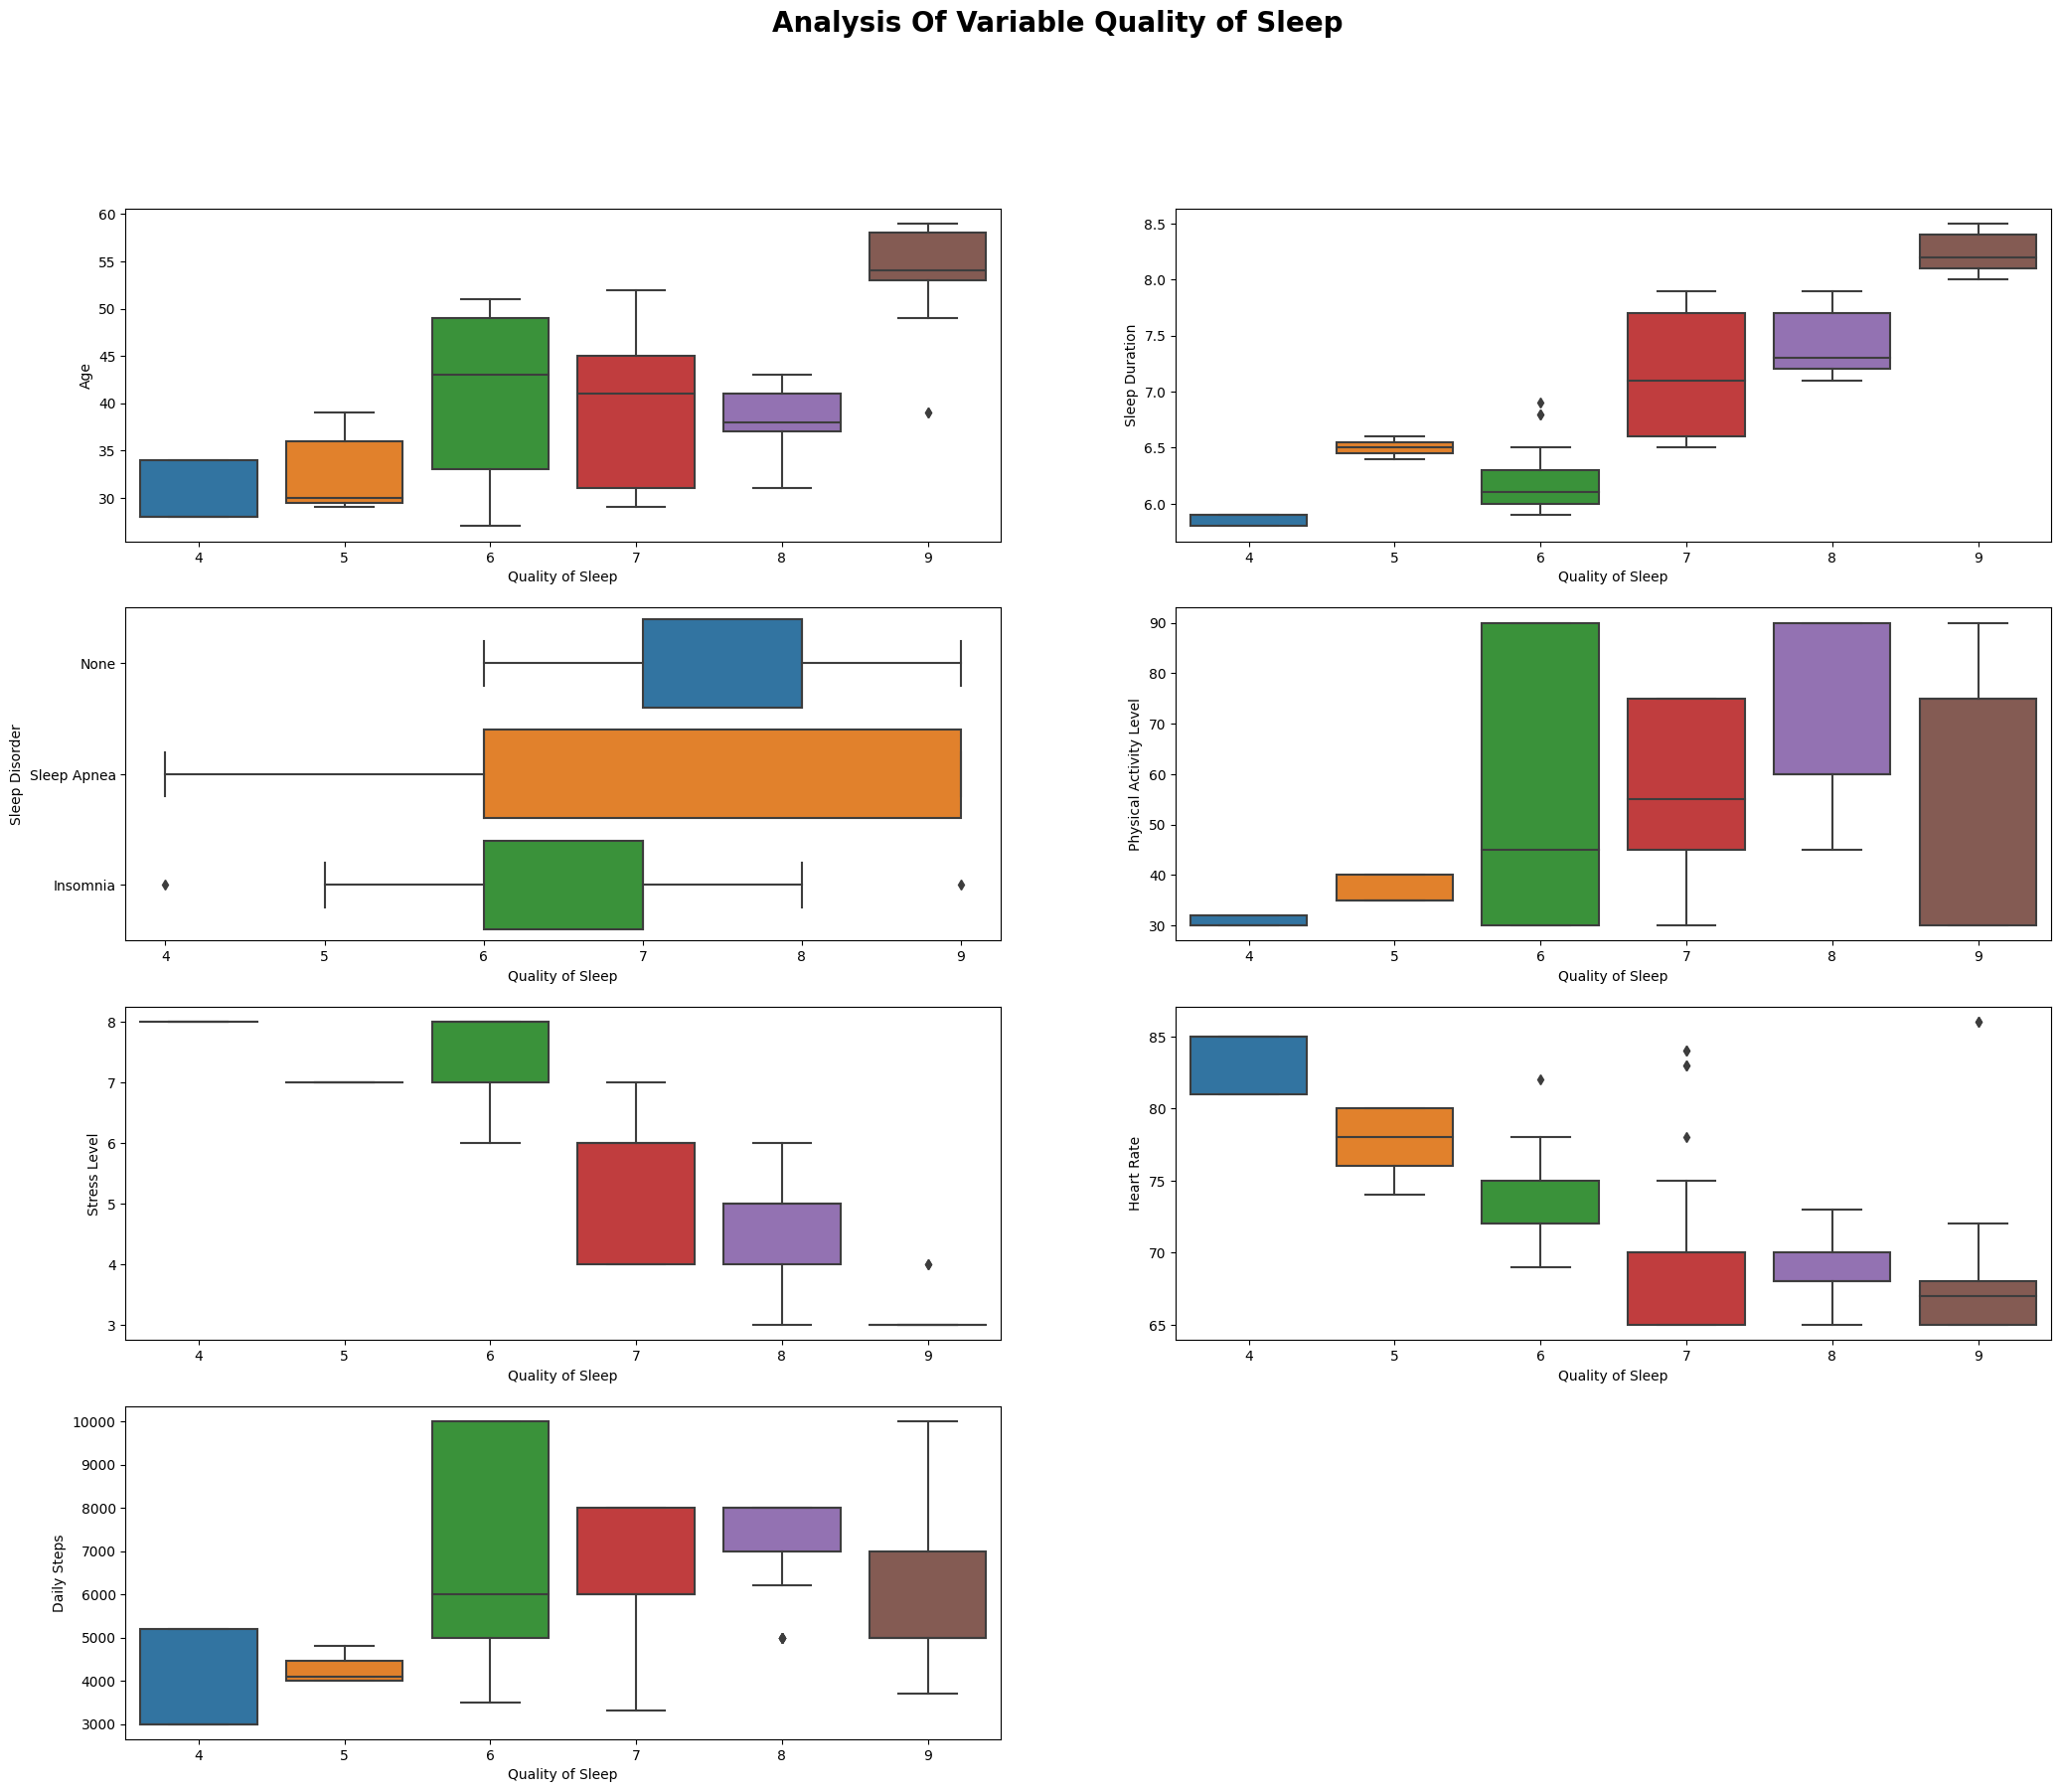

In [115]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Quality of Sleep",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x="Quality of Sleep", y="Age", data=sleep_df)

plt.subplot(4,2,2)
sns.boxplot(x="Quality of Sleep", y="Sleep Duration", data=sleep_df)

plt.subplot(4,2,3)
sns.boxplot(x="Quality of Sleep", y="Sleep Disorder", data=sleep_df)

plt.subplot(4,2,4)
sns.boxplot(x="Quality of Sleep", y="Physical Activity Level", data=sleep_df)

plt.subplot(4,2,5)
sns.boxplot(x="Quality of Sleep", y="Stress Level", data=sleep_df)

plt.subplot(4,2,6)
sns.boxplot(x="Quality of Sleep", y="Heart Rate", data=sleep_df)

plt.subplot(4,2,7)
sns.boxplot(x="Quality of Sleep", y="Daily Steps", data=sleep_df)

**Developing and training ANN model Using Dataset**
****

In [165]:
# dividing data set into X and Y
X = encoded_sleep_df[needed_features]
y = encoded_sleep_df['Quality of Sleep']

In [166]:
# scaling the X
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

X = standard_scaler.fit_transform(X.copy())
X = pd.DataFrame(X, columns = needed_features)

In [167]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 5)

# getting the number of neurons to be used
number_of_neurons = X_train.shape[1]


In [ ]:
from keras.optimizers import Adam

def create_model(activation='relu', hidden_layer_sizes=(3, 2, 4), input_shape=number_of_neurons, num_classes=6):
    input_layer = Input(shape=(input_shape,))
    hidden_layer1 = Dense(hidden_layer_sizes[0], activation=activation)(input_layer)
    hidden_layer2 = Dense(hidden_layer_sizes[1], activation=activation)(hidden_layer1)
    hidden_layer3 = Dense(hidden_layer_sizes[2], activation=activation)(hidden_layer2)
    output_layer = Dense(num_classes, activation='softmax')(hidden_layer3)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    return model

model = create_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=13)


In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
model.summary()

In [177]:
# defining parameters for the grid search
param_grid = {
    'hidden_layer_sizes': [(3, 2, 4), (5, 3, 1)],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

# creating an MLP classifier
mlp_classifier = KerasClassifier(build_fn = create_model, activation='relu',hidden_layer_sizes=(3, 2, 4),verbose=0)

# using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [178]:
best_params = grid_result.best_params_

new_model = create_model(
    activation=best_params['activation'],
    hidden_layer_sizes=best_params['hidden_layer_sizes']
    )

# tuning the model with the tuned hyperparameters and evaluating the model
new_history = new_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])
new_model.evaluate(X, y)

Epoch 1/100
19/19 [==============================] - 1s 3ms/step - loss: 1.8209 - accuracy: 0.0870 
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 1.7719 - accuracy: 0.1371
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 1.7297 - accuracy: 0.2174
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 1.6929 - accuracy: 0.2575
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 1.6593 - accuracy: 0.3746
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 1.6263 - accuracy: 0.4482
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 1.5947 - accuracy: 0.4615
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 1.5641 - accuracy: 0.4916
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 1.5331 - accuracy: 0.5284
Epoch 10/100
19/19 [==============================] - 0s 3ms/step - loss: 1.5023 - accuracy: 0.5819
Epoch 11

[0.29530414938926697, 0.9465240836143494]

In [179]:
new_model.evaluate(X, y)

12/12 [==============================] - 0s 2ms/step - loss: 0.2953 - accuracy: 0.9465


[0.29530414938926697, 0.9465240836143494]

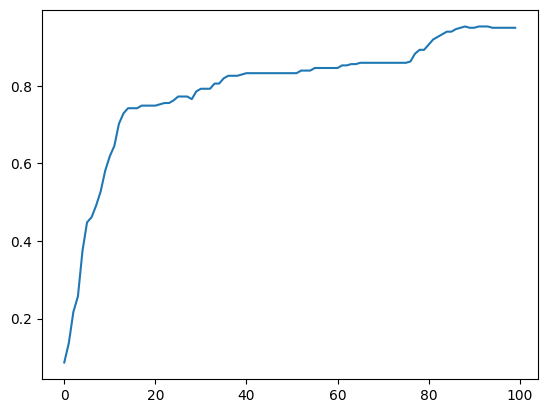

In [180]:
plt.plot(new_history.history['accuracy'])

**Saving Model**
****

In [183]:
# saving the functional tuned model
new_model.save('saved_model.h5')

In [184]:
# saving the scaler method used
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(standard_scaler, file)